# **Import Modules**

## *python*

In [1]:
# Import python modules
import os,sys
import pandas as pd
from IPython.display import display

## *custom*

In [2]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join('..')))

##import relevant modules
try:
    from scripts._03_Target_Engineering import RiskTargetBuilder
    from scripts._02_Feature_Engineering import FraudDetectionPipeline

except ImportError:
    print('Could not import module from `scripts/`.')

# **Target Engineering**

In [3]:
# Define DataFrame path
df_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed/processed_data.csv')
df_dir = os.path.join(os.path.dirname(os.getcwd()), 'data','processed')

In [4]:
# Instantiate the RiskTargetBuilder class
risk_builder = RiskTargetBuilder (df_path = df_path)

# Generate the proxy target variable
proxy_target_df = risk_builder.generate_target()

# Display the generated target variable DataFrame
display(proxy_target_df.head())

Computing RFM metrics...

RFM table computed.

Scaling RFM features...

RFM features scaled.

Clustering customers into 3 segments...

Clustering completed.

Assigning high-risk labels...

Identified high-risk cluster: 0

Risk labels assigned.

Proxy target variable ready.


,CustomerId,is_high_risk
0,CustomerId_1,1
1,CustomerId_10,1
2,CustomerId_1001,1
3,CustomerId_1002,0
4,CustomerId_1003,0


# **Merge Data**

In [5]:
# Load feature engineering data
df = pd.read_csv (df_path)

# Merge into your processed features
df_labeled = df.merge(proxy_target_df, on="CustomerId", how="left")

In [6]:
# Save merged DataFrame
# Create output folder if it doesn't exist
if not os.path.exists(df_dir):
    os.makedirs(df_dir)

df_name = os.path.join(df_dir, 'target_engineering_data.csv')

# Calculate the relative path
current_directory = os.getcwd()
relative_path = os.path.relpath(df_name, current_directory)
            
# Save processed data to CSV
df_labeled.to_csv(df_name, index=False)
print(f'\nProcessed DataFrame saved to: {relative_path}')

print('\nDataFrame Head:')
out_head=df_labeled.head()
display (out_head)

print("\nDataFrame shape:")
display(df_labeled.shape)
                
print("\nDataFrame columns:")
display(df_labeled.columns)
                
print("\nDataFrame summary:")
df_labeled.info()
        
print('\nDataFrame Description:')
display(df_labeled.describe())


Processed DataFrame saved to: ..\data\processed\target_engineering_data.csv

DataFrame Head:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,is_high_risk
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,1000,2018-11-15 03:32:55+00:00,2,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,0



DataFrame shape:


(95662, 17)


DataFrame columns:


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'is_high_risk'], dtype='object')


DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15 

,CountryCode,Amount,Value,PricingStrategy,FraudResult,is_high_risk
count,95662.0,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,2358.107524,2.255974,0.002018,0.115260
std,0.0,1.233068e+05,3116.839524,0.732924,0.044872,0.319337
min,256.0,-1.000000e+06,2.000000,0.000000,0.000000,0.000000
25%,256.0,-5.000000e+01,275.000000,2.000000,0.000000,0.000000
50%,256.0,1.000000e+03,1000.000000,2.000000,0.000000,0.000000
75%,256.0,2.800000e+03,3000.000000,2.000000,0.000000,0.000000
max,256.0,9.880000e+06,12050.000000,4.000000,1.000000,1.000000


# **Modelling**

In [7]:
# Define DataFrame path
df_path = os.path.join(os.path.dirname(os.getcwd()), 'data/processed/target_engineering_data.csv')
plot_path = os.path.join(os.path.dirname(os.getcwd()), 'plots/targetengineering')
df_dir = os.path.join(os.path.dirname(os.getcwd()), 'data','processed')
mdl_dir = os.path.join(os.path.dirname(os.getcwd()), 'models')

In [8]:
# Initalise pipeline
target_pipeline = FraudDetectionPipeline(df_path = df_path, target = 'is_high_risk',
                                            df_dir = df_dir, plot_path = plot_path, mdl_dir = mdl_dir)

# Load data and save processed data
target_pipeline.load_and_split_data()
target_pipeline.save_processed_data(filename = 'feature_target_engineering_data.csv')

Data loaded, split, aggregated, and categorical NAs filled.

Processed DataFrame saved to: ..\data\processed\feature_target_engineering_data.csv

DataFrame Head:


,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,is_high_risk,txn_hour,txn_day,txn_month,txn_year,total_txn_amount,avg_txn_amount,txn_count,std_txn_amount
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0,0,2,15,11,2018,109921.75,923.712185,119,3042.294251
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0,1,2,15,11,2018,1000.00,500.000000,2,0.000000
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,1000,2,0,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0,0,3,15,11,2018,228727.20,6019.136842,38,17169.241610



DataFrame Description:


,Amount,Value,PricingStrategy,FraudResult,is_high_risk,txn_hour,txn_day,txn_month,txn_year,total_txn_amount,avg_txn_amount,txn_count,std_txn_amount
count,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,9.495000e+04
mean,6.717846e+03,2358.107524,2.255974,0.002018,0.115260,12.447722,15.902898,6.566233,2018.497115,-3.599090e+06,6.717846e+03,392.982982,1.803696e+04
std,1.233068e+05,3116.839524,0.732924,0.044872,0.319337,4.846964,8.962822,5.224310,0.499994,2.180271e+07,8.568352e+04,878.631072,8.929570e+04
min,-1.000000e+06,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,-1.049000e+08,-4.250000e+05,1.000000,0.000000e+00
25%,-5.000000e+01,275.000000,2.000000,0.000000,0.000000,8.000000,8.000000,1.000000,2018.000000,6.000000e+04,1.260812e+03,32.000000,3.206563e+03
50%,1.000000e+03,1000.000000,2.000000,0.000000,0.000000,13.000000,16.000000,11.000000,2018.000000,2.015113e+05,2.272951e+03,93.000000,5.896327e+03
75%,2.800000e+03,3000.000000,2.000000,0.000000,0.000000,17.000000,24.000000,12.000000,2019.000000,7.089360e+05,4.080464e+03,273.000000,1.038269e+04
max,9.880000e+06,12050.000000,4.000000,1.000000,1.000000,23.000000,31.000000,12.000000,2019.000000,8.345124e+07,8.601821e+06,4091.000000,3.309916e+06


In [9]:
# Compute breaks and apply transformation
target_pipeline.compute_monotonic_breaks()
target_pipeline.compute_categorical_breaks()
target_pipeline.apply_woe_transformation()

# Prepare and save DataFrame
target_pipeline.merge_and_clean()


Numeric WOE breaks computed.
[INFO] creating woe binning ...
[INFO] The breaks_list is saved as cat_breaks_20250702_050304.py

Categorical WOE breaks computed and merged.
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...

WOE transformation applied.

Final dataset merged and cleaned.


In [10]:
# WoE and IV transformation
target_pipeline.run_iv_analysis()
target_pipeline.filter_variables()

IV Analysis:

                variable  info_value
7         std_txn_amount    6.478319
26        avg_txn_amount    6.335652
17      total_txn_amount    6.138375
15             txn_count    3.768829
0              txn_month    2.470771
14              txn_year    1.664274
22          txn_year_woe    1.664274
12         txn_month_woe    0.862037
4                 Amount    0.493142
2                txn_day    0.381778
5          txn_count_woe    0.294375
3                  Value    0.175384
8             Amount_woe    0.123953
11           txn_day_woe    0.122081
25    std_txn_amount_woe    0.100095
24    avg_txn_amount_woe    0.052772
10         ProductId_woe    0.047000
6         ProviderId_woe    0.042062
1               txn_hour    0.030733
9    ProductCategory_woe    0.023030
21             Value_woe    0.006846
18          txn_hour_woe    0.006383
19   PricingStrategy_woe    0.004022
23  total_txn_amount_woe    0.003080
20         ChannelId_woe    0.002496
16           FraudResult

Model trained.

Coefficients:
[[ 2.13006571e-02  1.26423317e-02 -5.53307168e-02 -2.58717999e-05
  -3.86817859e-08  1.17051596e-01  2.89274879e-07 -2.12950747e-01
   1.18543012e-01 -3.23206793e-01 -2.26020631e-01  1.31365915e+00
   5.91372723e-05 -1.42605130e-02 -8.02807091e-08 -2.06697415e+00
  -4.73361913e-01 -1.04275482e+00  4.43424765e-07]]

Train Performance:


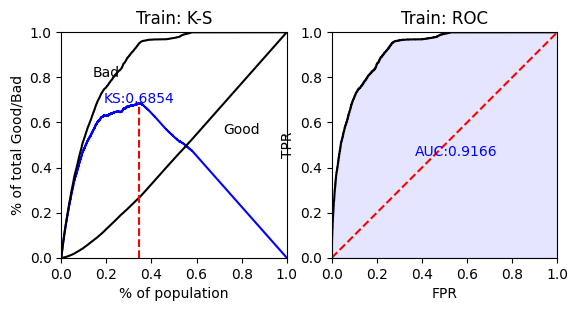

Test Performance:


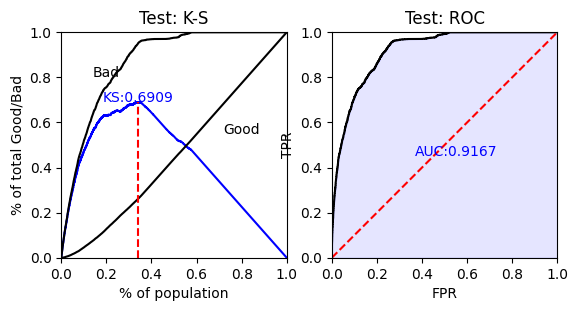

Accuracy: 0.9086030872155825
AUC Score: 0.6730774817286896

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     25391
           1       0.70      0.37      0.48      3308

    accuracy                           0.91     28699
   macro avg       0.81      0.67      0.72     28699
weighted avg       0.90      0.91      0.90     28699


Plot saved to ..\plots\targetengineering\Confusion Matrix - Logistic Regression.png


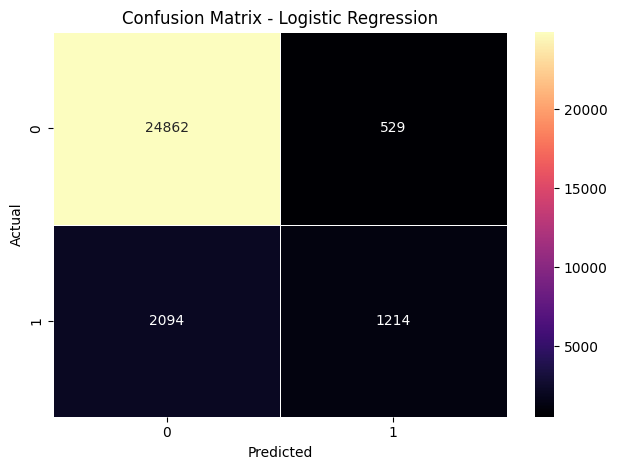

In [11]:
# Model training evaluation and prediction
target_pipeline.train_model()

target_pipeline.evaluate_model()

#pipeline.predict(df_new)

In [12]:
# Save model
target_pipeline.save_model(filename="credit_risk_model.pkl")

# Open saved model
target_pipeline.load_model(filename="credit_risk_model.pkl")


Fraud detection model saved to: ..\models\credit_risk_model.pkl

Model loaded from: ..\models\credit_risk_model.pkl
